<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_NLP_analise_de_sentimento_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Linguagem Natural parte 2: NLP com análise de sentimento</b></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/nlp-com-analise-de-sentimento><font size=2 color=gray>Linguagem Natural parte 2: continuando com a análise de sentimento</a>
<li>Carga Horária: 4 h
<li>Instrutora: Thiago G Santos
<li>Data de início: ago. 2022
<!-- </ul> -->

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Melhoria dos resultados da classificação com normalização dos textos
- TF-IDF e Ngrams para melhorar a classificação.
- Vetorização por espaço e pontuação
- Vetorização de radicais (remoção de sufixos)
- Tratamentos:
    - Remoção de acentuação
    - Conversão para caixa-baixa
- Exploração do Modelo de Classificação de Sentimentos


# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>Tratamento</b></font>
    * Pontuação
    * Acentuação
    * Caixa alta
    * Flexões e derivações
* <font color=orange><b>Vetorização</b></font>
    * Ngrams
    * TF-IDF (ponderação da frequencia)


# <font color=orange>CURSO 1</font>



In [ ]:
# Para o output do Colab quebre as linhas longas
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

import pandas as pd

# AMBIENTE PARA BAIXAR DADOS DO KAGGLE - exige o arquivo de API
!pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle  # remove any file
!mkdir ~/.kaggle  # remove any folder
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

# BAIXA O ARQUIVO DO CURSO
!kaggle datasets download -d luisfredgs/imdb-ptbr

# DESCOMPACTAÇÃO DO ZIP
!mkdir ./data
!unzip imdb-ptbr.zip -d ./data

uri = './data/imdb-reviews-pt-br.csv'
resenha = pd.read_csv(uri)
classificacao = resenha["sentiment"].replace(["neg", "pos"],[0, 1])
resenha["classificacao"] = classificacao

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 85% 41.0M/48.4M [00:02<00:00, 15.2MB/s]
100% 48.4M/48.4M [00:02<00:00, 18.7MB/s]
Archive:  imdb-ptbr.zip
  inflating: ./data/imdb-reviews-pt-br.csv  


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk


In [ ]:
# Stop Words
import nltk

nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
token_espaco = nltk.tokenize.WhitespaceTokenizer()

frase_processada = list()
for opiniao in resenha["text_pt"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# PARETO
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica.score(teste, classe_teste)

In [ ]:
# NUVEM DE PALAVRAS
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# <font color=orange>CURSO 2: Introdução ao Processamento de Linguagem Natural com Python (Parte 2)</font>

Neste cursos serão vistos algumas estratégias para melhorar a performance do classificador através da normalização do texto. Técnicas de vetorização e tokenização, assim como tratamentos para normalizar e evitar possíveis erros ou diferenças na digitação das palavras.

## <font color=orange>Tokenização - Pontuação</font>

A tokenização com pontuação separa as palavras conectadas de pontuação, evitando a criação de tokens poluídos na nossa análise. Nesse processo as pontuações serão consideradas tokens separados, permitindo a remoção destes junto dos stopwords.


In [ ]:
# Teste de tokenização com pontuação
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


<h3>Aplicação no <i>case</i></h3>

In [ ]:
# Aplicação da tokenização com pontuação nos comentários de filmes
from string import punctuation
import nltk

# Lista de pontuação
pontuacao = [p for p in punctuation]

# Construção do Stopwords
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
pontuacao_stopwords = pontuacao + palavras_irrelevantes

token_pontuacao = tokenize.WordPunctTokenizer()

# Construção dos vetores
frase_processada = []
for opiniao in resenha['tratamento_1']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)  # tokenização
    # Remoção de STOPWORDS
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
resenha.sample(5)

id                                            text_en  \
2330    2332  Almost a masterclass in how not to direct a mo...   
813      814  Detective Sergent Vince De Carlo James Luisi a...   
35298  35300  The title should have been "The walker". That ...   
46026  46028  This film may seem dated today, but remember t...   
14305  14307  This is the kind of movie that people of a cer...   

                                                 text_pt sentiment  \
2330   Quase uma aula de como não dirigir um filme. A...       neg   
813    O detetive Sergio Vince De Carlo James Luisi e...       neg   
35298  O título deveria ter sido "O caminhante". Foi ...       neg   
46026  Este filme pode parecer datado de hoje, mas le...       pos   
14305  Este é o tipo de filme que as pessoas de certa...       pos   

       classificacao                                       tratamento_1  \
2330               0  Quase aula dirigir filme. A partir roteiro equ...   
813                0  O detetive Sergio Vince De Carlo James Luisi c...   
35298              0  O título deveria ter sido "O caminhante". Foi ...   
46026              1  Este filme pode parecer datado hoje, lembre-se...   
14305              1  Este tipo filme pessoas certa idade dirão "Eu ...   

                                            tratamento_2  
2330   Quase aula dirigir filme A partir roteiro equi...  
813    O detetive Sergio Vince De Carlo James Luisi c...  
35298  O título deveria ter sido O caminhante ". Foi ...  
46026  Este filme pode parecer datado hoje lembre fei...  
14305  Este tipo filme pessoas certa idade dirão Eu a...

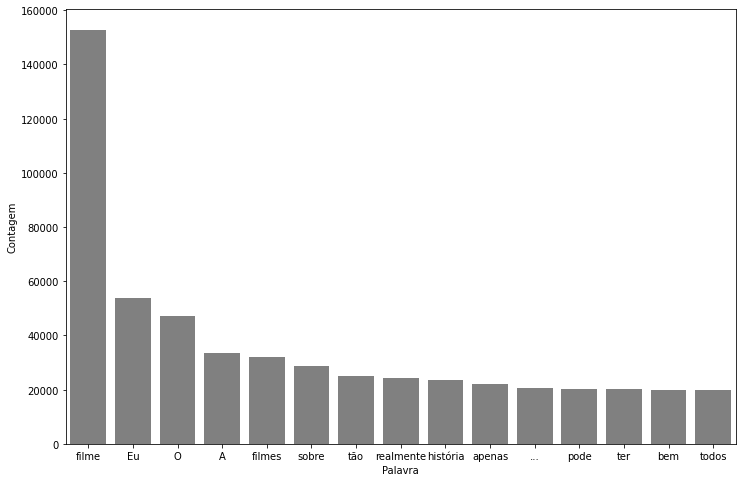

In [ ]:
pareto(resenha, 'tratamento_2', 15)

In [ ]:
# Análise da frequência das palavras
todas_palavras = ' '.join([texto for texto in resenha['tratamento_2']])  # Corpus
token_espaco = nltk.tokenize.WhitespaceTokenizer()  # Tokenização - espaço
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))  # Distribuição da frequencia

# Tabela de Frequência
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

Palavra  Frequência
5        filme      152842
231         Eu       53719
31           O       47326
19           A       33663
80      filmes       32150
61       sobre       28875
227        tão       24939
165  realmente       24146
467   história       23599
392     apenas       22150

## <font color=orange>Tratamento - Acentuação</font>

Remoção de pontuação para evitar problemas de erro de digitação com pontuação.

In [9]:
# %%capture
!pip install Unidecode

/bin/bash: -c: line 0: syntax error near unexpected token `pip'
/bin/bash: -c: line 0: `%(pip install Unidecode)'


In [2]:
# Remoção de pontuação
import unidecode

acentos = 'ótimo, péssimo, não, é tão terrível'
teste = unidecode.unidecode(acentos)
print(teste)

otimo, pessimo, nao, e tao terrivel


<h3>Aplicação no <i>case</i></h3>

In [ ]:
# REMOÇÃO DE ACENTOS
sem_acentos = [unidecode.unidecode(frase) for frase in resenha['tratamento_2']]

Para evitar que não seja encontrada a palavra "não", pois no texto ela se apresenta sem acento ("nao"), vamos remover também da lista de stopwords.

In [ ]:
# REMOÇÃO DE ACENTOS DO STOPWORDS
stopwords_sem_acento = [unidecode.unidecode(frase) for frase in pontuacao_stopwords]

In [ ]:
resenha['tratamento_3'] = sem_acentos
resenha.sample(5)

id                                            text_en  \
397      398  Ive read the positive comments on this movie. ...   
48514  48516  Ok, so it may not be the award-winning "movie ...   
30557  30559  Almost from the word go this film is poor and ...   
1195    1196  One of the few reasons to make these pointlss ...   
16075  16077  Alexander Lou, star of classics such as The Su...   

                                                 text_pt sentiment  \
397    Eu li os comentários positivos sobre este film...       neg   
48514  Ok, então pode não ser o tipo de filme premiad...       pos   
30557  Quase a partir da palavra ir este filme é pobr...       neg   
1195   Uma das poucas razões para fazer esses filmes ...       neg   
16075  Alexander Lou, estrela de clássicos como The S...       pos   

       classificacao                                       tratamento_1  \
397                0  Eu li comentários positivos sobre filme. Eu su...   
48514              1  Ok, então pode tipo filme premiado "filme ano"...   
30557              0  Quase partir palavra ir filme pobre convicção,...   
1195               0  Uma poucas razões fazer filmes dar alguns ator...   
16075              1  Alexander Lou, estrela clássicos The Super Nin...   

                                            tratamento_2  \
397    Eu li comentários positivos sobre filme Eu sup...   
48514  Ok então pode tipo filme premiado filme ano ",...   
30557  Quase partir palavra ir filme pobre convicção ...   
1195   Uma poucas razões fazer filmes dar alguns ator...   
16075  Alexander Lou estrela clássicos The Super Ninj...   

                                            tratamento_3  
397    Eu li comentarios positivos sobre filme Eu sup...  
48514  Ok entao pode tipo filme premiado filme ano ",...  
30557  Quase partir palavra ir filme pobre conviccao ...  
1195   Uma poucas razoes fazer filmes dar alguns ator...  
16075  Alexander Lou estrela classicos The Super Ninj...

In [ ]:
# Aplicação da tokenização com palavras já sem acento
frase_processada = []
for opiniao in resenha['tratamento_3']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3b'] = frase_processada

In [ ]:
# TESTE: Faz sentido o procedimento anterior? 
# A execução da remoção de acentos do Tratamento_2 não resulta no mesmo objeto?

a = resenha['tratamento_3b'].str.len() == resenha['tratamento_3'].str.len()
for index,i in enumerate(a):
    if i == False:
        print(resenha.loc[index, 'tratamento_3b'])
        print(resenha.loc[index, 'tratamento_3'], '\n')

# Algumas frases mostraram diferença. Por tanto, houve contribuição. Estudar melhor sobre este procedimento.

Este exemplo motivo maioria filmes acao mesmos Generico chato nada valha pena assistir aqui Um completo desperdicio talentos Ice T Cubo Gelo mal aproveitados cada comprovando capazes atuar agir bem Nao incomode va ver New Jack City Ricochet assistir New York Undercover Ice T Boyz Hood Higher Learning Friday Ice Cube ver negocio real Ice Ts horrivelmente cliche dialogo sozinho faz filme ralar dentes ainda perguntando diabos Bill Paxton fazendo neste filme E diabos sempre interpreta exatamente personagem Dos extraterrestres diante todos filmes vi Bill Paxton fizeram interpretar exatamente personagem irritante menos Aliens personagem morreu tornou pouco gratificante ... No geral lixo acao segunda classe Existem incontaveis filmes melhores ver realmente quiser ver filme assista Judgment Night praticamente copia carbono melhor atuacao roteiro melhor A unica coisa fez valer pena assistir mao decente camera cinematografia quase refrescante chega perto compensar horrivel filme si bem assim 4 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Eu pensei otima ideia rapaz mal executado Temos nocao ampla quao complexas desafiadoras operacoes bastidores programa praticamente detalhes sobre funcionamento show Os produtores parecem ter encontrado nenhuma maneira contar historia dar espectador linha direta ". O quer dizer tentaram fazer assistentes palco relatem sinopse ciclo Anel narrativa programas diz nada sobre trabalho montar fisicamente opera Vimos muitas coisas acontecendo pouco fala sobre pessoas fazendo que Ha pouca nocao varios departamentos producao encaixam trabalham juntos Por exemplo varias vezes ouvimos falar algum problema espera entao problema consequencias resolvido Mas vez disso cineastas geralmente cortam outra coisa geralmente imagens genericas pessoas empurrando coisas conversando fones ouvido No geral filme acaba sentindo pastiche imagens ve rodando sob creditos finais programa vez qualquer coisa valha pena observar proprio merito 

Eu realmente desprezei filme vi cerca 6 7 anos grande fa Robin Williams nada

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Desde Douglas MacArthur afetou vidas humanas melhor qualquer outro presidente americano eleito mereceu melhor biografia cinematografica Nao universais MacArthur ruins Seu apenas tudo deveria ter sido O suficiente potencial la Desde episodio inicial Jornada Estrelas ", The Corbomite Maneuver 1966 recentes filmes HBO Something the Lord Made 2OO4 Warm Springs 2OO5 diretor Joseph Sargent emergiu diretores expressivamente humanos cinema homem capaz moldar sutilmente aspectos emocionais performances atores levar publico exatamente onde quer ir O produtor Frank McCarthy deu Patton 197O legendario Jerry Goldsmith marcou ambos filmes Universal amplamente elogiou fato filme quatro anos preparacao producao ". No entanto tudo MacArthur perfeitamente adequado O filme comeca inicio 1942 pouco antes general sitiado presidente Franklin D Roosevelt Dan O Herlihya fugir Filipinas evitar captura japoneses Assim filme omite MacArthurs nasceu quartel fronteirico Arkansas ainda sujeito ataques tribos nativ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Este conto completamente diabolico quao ruim coisas podem dar errado Um simples assalto Pegue mudanca Junte financas tudo ficara bem Mas mae pop joalheria Sem problemas O seguro paga tudo Sem armas Ninguem machuca Dinheiro facil Mais antigo bem sucedido parece irmao Andy Philip Seymour Hoffman alguns pequenos problemas Dependencia heroina habituacao cocaina Uma esposa Marisa Tomei bem consegue apresentar Seus dias barriga lisa Irmao novo doce pouco covarde Hank Ethan Hawke alguns problemas dinero proprio Atras pagamentos apoio crianca filha divida amigos parentes exatamente impressionando trabalho etc Sydney Adelaide nesta performance 82 anos !, Direciona obtem 99 99 certo E dificil fazer thriller Eu vi filmes suspense lembro maioria vezes diretor imprime filme vive furos trama improbabilidades cenas extravagantes final rapido Aqui Lumet faz thriller obra arte Cada detalhe perfeito A atuacao soberba O enredo buracos A historia soa verdadeira clara representa conto sobre fragilidade hu

In [ ]:
classificar_texto(resenha, 'tratamento_3', 'classificacao')

0.6887990295188031

In [ ]:
classificar_texto(resenha, 'tratamento_3b', 'classificacao')

0.6887990295188031

## <font color=orange>Tratamento - Caixa alta</font>

In [ ]:
frase = 'Ele é o novo CEO da Google'
print(frase.lower())

ele é o novo ceo da google


In [ ]:

frase_processada = []
for opiniao in resenha['tratamento_3b']:
    nova_frase = []
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [ ]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
print(acuracia_tratamento4)

0.6874241811564901


## <font color=orange> Tratamento - flexões e derivações</font>

A stemmização é o processo de obteção do radical das palavras.

Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações. Existem diversos algoritmos para realizar a “stemmização”, seja em Português, sejam em outros idiomas.

In [ ]:
# Remoção de SUFIXO
nltk.download('rslp')

stemmer = nltk.RSLPStemmer()
stemmer.stem('infelicidade')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


'infelic'

In [ ]:
# Remoção do sufixo em todas as palavras dos comentários
frase_processada = []
for opiniao in resenha['tratamento_4']:
    nova_frase = []
    # opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [ ]:
# Avaliação do impacto da transformação
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6954306510311363
0.6874241811564901


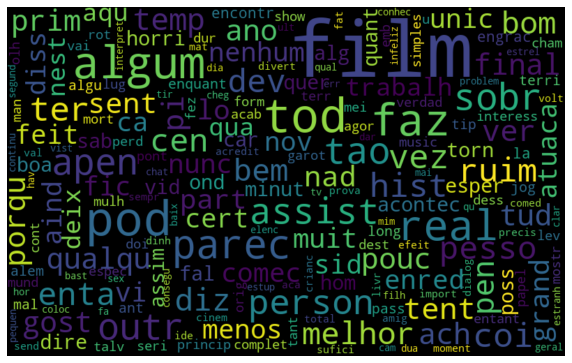

In [ ]:
nuvem_palavras_neg(resenha, "tratamento_5")

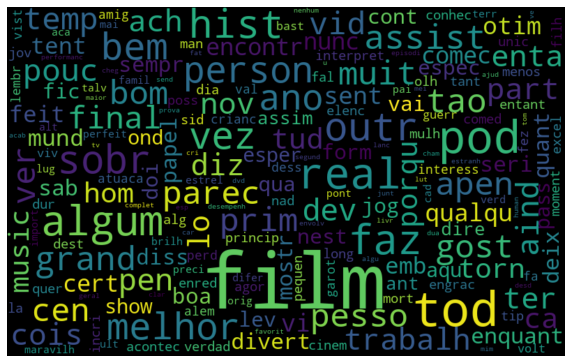

In [ ]:
nuvem_palavras_pos(resenha, "tratamento_5")

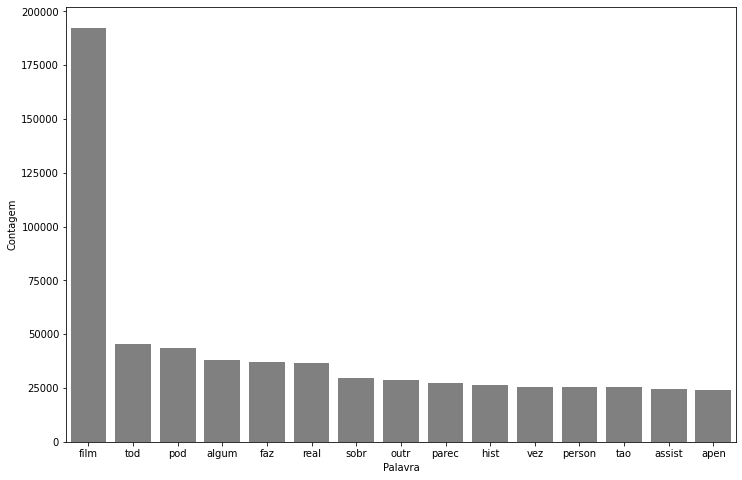

In [ ]:
pareto(resenha, 'tratamento_5', 15)

## <font color=orange> Vetorização - TF-IDF</font>

É uma **técnica de vetorização** que atribui pesos diferentes à palavras de forma inversamente proporsional à frequencia delas no _corpus_. Isso serve para retirar a importância de palavras que são muito presentes em todos os textos, não auxiliando em sua classificação.

A principal característica do TF-IDF é ser uma pontuação proporcional à frequência da palavra no texto e equilibrada pela frequência no corpus, ou seja, palavras que se repetem muito em todo o corpus tendem a ter pontuações menores. 

In [ ]:
# TF-IDF em frases 
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)  # -> retorna uma 'sparse matrix'

pd.DataFrame(caracteristicas.todense(), 
             columns=tfidf.get_feature_names_out()
)  # converte uma matriz esparsa em um matriz convencional

Assiti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [ ]:
%%time
# APLICAÇÃO DA VETORIZAÇÃO TF-IDF NO CASO DOS COMENTÁRIOS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vetorização tf-idf no texto não tratado
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

# Treino e Teste HoldOut
treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_bruto, resenha['classificacao'],
    random_state=42
)

# Classificação
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [ ]:
%%time
# APLICAÇÃO DA VETORIZAÇÃO TF-IDF NO CASO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vetorização tf-idf no texto normalizado
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

# Treino e Teste HoldOut
treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_tratados, resenha['classificacao'],
    random_state=42
)

# Classificação
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6963202587949858
CPU times: user 4.73 s, sys: 27.4 ms, total: 4.76 s
Wall time: 4.77 s


## <font color=orange> Vetorização - Ngrams</font>

É uma forma de gerar **memória** da sequencia das palavras.

O custo do ngrams é que serão multiplicadas as dimensões de processamento, custo mais esforço computacional.

* Ngrams costumam ficar na posição mediana na frequencia das palavras, então não é recomendado limitar a quantidade de palavras 

Embora o Ngrams seja um método que pode otimizar o seu resultado devemos ter cuidado, já que ao utilizá-lo o nosso vetor Bag of Words aumenta consideravelmente de tamanho, o que também faz com que o custo computacional aumente.

In [ ]:
# Geração de Ngrams - Composição de palavras
from nltk import ngrams

frase = "Assisti um ótimo filme."

frase_separada = token_espaco.tokenize(frase)
print(frase_separada)

pares = ngrams(frase_separada, 2)
print(list(pares))

['Assisti', 'um', 'ótimo', 'filme.']
[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]


<h3>

In [ ]:
# Implementação de Ngrams no caso dos comentários
# Vetorização tf-idf COM NGRAMS DE [1 e 2]
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))  # ngrams de 1 e de 2
# Não deve-se usar o limite de palavras para ngrams, pois ele sempre estarão no meio da distribuição
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])


treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf,
    resenha["classificacao"],
    random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8856449656287909


In [ ]:
# Para comparar com todo os vetores
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])


treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf,
    resenha["classificacao"],
    random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8847553578649414


## Exploração do Modelo

In [ ]:
# Peso das palavras
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

# maiores pesos na classificação
pesos.nlargest(10,0)

0
otim      8.308764
excel     7.992873
perfeit   6.548340
favorit   5.781070
maravilh  5.291923
incri     5.052462
hilari    4.653921
divert    4.552039
ador      4.409966
brilh     4.268854

In [ ]:
# menores pesos
pesos.nsmallest(10,0)

0
pi      -9.185322
ruim    -9.179967
horri   -8.761630
terri   -7.195886
chat    -6.921456
nad     -6.032698
infeliz -5.297961
decepca -4.984679
ridicul -4.971187
parec   -4.939297

* Encontrar ngramas em textos: quais os conceitos mais recorrentes em textos (remoção de artigos etc)
    - Como encontrar 'direito à cidade', 'racismo estrutural', 'terapia cognitiva comportamental'

<a href=https://github.com/alura-cursos/pln-com-python/blob/master/Aula5.ipynb><font size=2; color=gray>Material de referencial do curso</a></font>